In [1]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/jackvessa/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9319  0.9336  0.9398  0.9405  0.9332  0.9358  0.0036  
MAE (testset)     0.7355  0.7357  0.7399  0.7426  0.7361  0.7380  0.0028  
Fit time          6.28    5.38    5.63    5.77    8.10    6.23    0.98    
Test time         0.21    0.16    0.22    0.22    0.31    0.22    0.05    


{'test_rmse': array([0.93192377, 0.93357446, 0.93984272, 0.94049623, 0.93323783]),
 'test_mae': array([0.73546406, 0.73574954, 0.73993063, 0.74262685, 0.73607657]),
 'fit_time': (6.275336027145386,
  5.380524635314941,
  5.6346518993377686,
  5.765064239501953,
  8.102767944335938),
 'test_time': (0.20976471900939941,
  0.15535497665405273,
  0.22061681747436523,
  0.21632075309753418,
  0.3113868236541748)}

In [44]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
user_df

In [27]:
user_df = pd.read_csv('data/users.dat', header=None, sep='::', engine='python')

In [28]:
user_df

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [24]:
movies_df

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [34]:
movies_df[2] = movies_df[2].apply(lambda x: x.replace('|', ' ').replace("'", "").lower())

In [38]:
vectorizer = CountVectorizer()
genre_vec = vectorizer.fit_transform(movies_df[2])
genre_vec = genre_vec.toarray()
genres = vectorizer.get_feature_names()

In [39]:
genres

['action',
 'adventure',
 'animation',
 'childrens',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'horror',
 'musical',
 'mystery',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [41]:
ratings_df = pd.read_csv('data/training.csv')

In [42]:
ratings_df

,user,movie,rating,timestamp
0,6040,858,4,956703932
1,6040,593,5,956703954
2,6040,2384,4,956703954
3,6040,1961,4,956703977
4,6040,2019,5,956703977
...,...,...,...,...
799995,1875,2940,5,975767255
799996,1875,589,4,975767289
799997,1875,110,4,975767289
799998,1875,2791,3,975767289


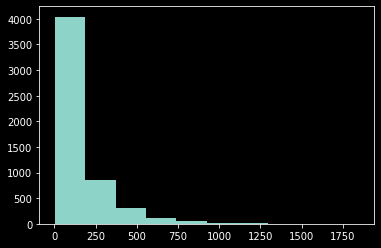

In [46]:
plt.hist(ratings_df.groupby('user').count()['rating']);

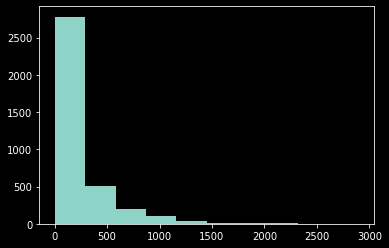

In [47]:
plt.hist(ratings_df.groupby('movie').count()['rating']);

In [48]:
print(ratings_df.groupby('movie').count()['rating'].max())
print(ratings_df.groupby('movie').count()['rating'].min())
print(round(ratings_df.groupby('movie').count()['rating'].mean(), 0))

2901
1
218.0


In [50]:
print(ratings_df.groupby('user').count()['rating'].max())
print(ratings_df.groupby('user').count()['rating'].min())
print(round(ratings_df.groupby('user').count()['rating'].mean(), 0))

1849
2
148.0


In [52]:
utility_matrix = ratings_df.pivot(index='user', columns='movie', values='rating')

In [54]:
sum(utility_matrix.count())/(utility_matrix.shape[0]*utility_matrix.shape[1])

0.04046302241176001

In [57]:
utility_matrix.sum(axis = 0).idxmax()

2858

In [58]:
utility_matrix.mean(axis = 0).idxmax()

787

In [69]:
from surprise import BaselineOnly
from surprise import SVD
from surprise import Dataset
from surprise import dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold

In [72]:
kf = KFold(n_splits=4)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.mae(predictions, verbose=True)

MAE:  0.6970
MAE:  0.6970
MAE:  0.6975
MAE:  0.6961


In [71]:
accuracy.mae(predictions, verbose=True)

MAE:  0.7058


0.7058467157103567

In [ ]:
from surprise import BaselineOnly
from surprise import SVD
from surprise import Dataset
from surprise import dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import KFold

In [ ]:
reader = Reader(line_format='user item rating', rating_scale=(1, 5))

# Also, a dummy Dataset class
class MyDataset(dataset.DatasetAutoFolds):
    def __init__(self, ratings_df, reader):
        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(ratings_df['user'], ratings_df['movie'], ratings_df['rating'])]
        self.reader=reader
data = MyDataset(ratings_df, reader)
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# You should now be able to use the data object normally.
#data.split(n_folds=3)
# algo = SVD()
# perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
# print_perf(perf)